In [1]:
import json
import zlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from analysis_funcs import stringify_test_cases, stringify_test_titles, calculate_pairwise_ncd, plot_heatmaps, kmeans_clustering

In [2]:
data_file = './data/jekyll/jekyll_parsed_steps.json'

with open(data_file, 'r') as f:
    test_data = json.load(f)

In [3]:
len(test_data)

286

In [4]:
step_definition_strings = stringify_test_cases(test_data, "step_definition")

In [5]:
step_name_strings = stringify_test_cases(test_data, "step_name")

In [6]:
scenario_nums, scenario_title_strings = stringify_test_titles(test_data)

In [7]:
step_name_ncd_matrix = calculate_pairwise_ncd(step_name_strings)
step_definition_ncd_matrix = calculate_pairwise_ncd(step_definition_strings)
scenario_title_ncd_matrix = calculate_pairwise_ncd(scenario_title_strings)

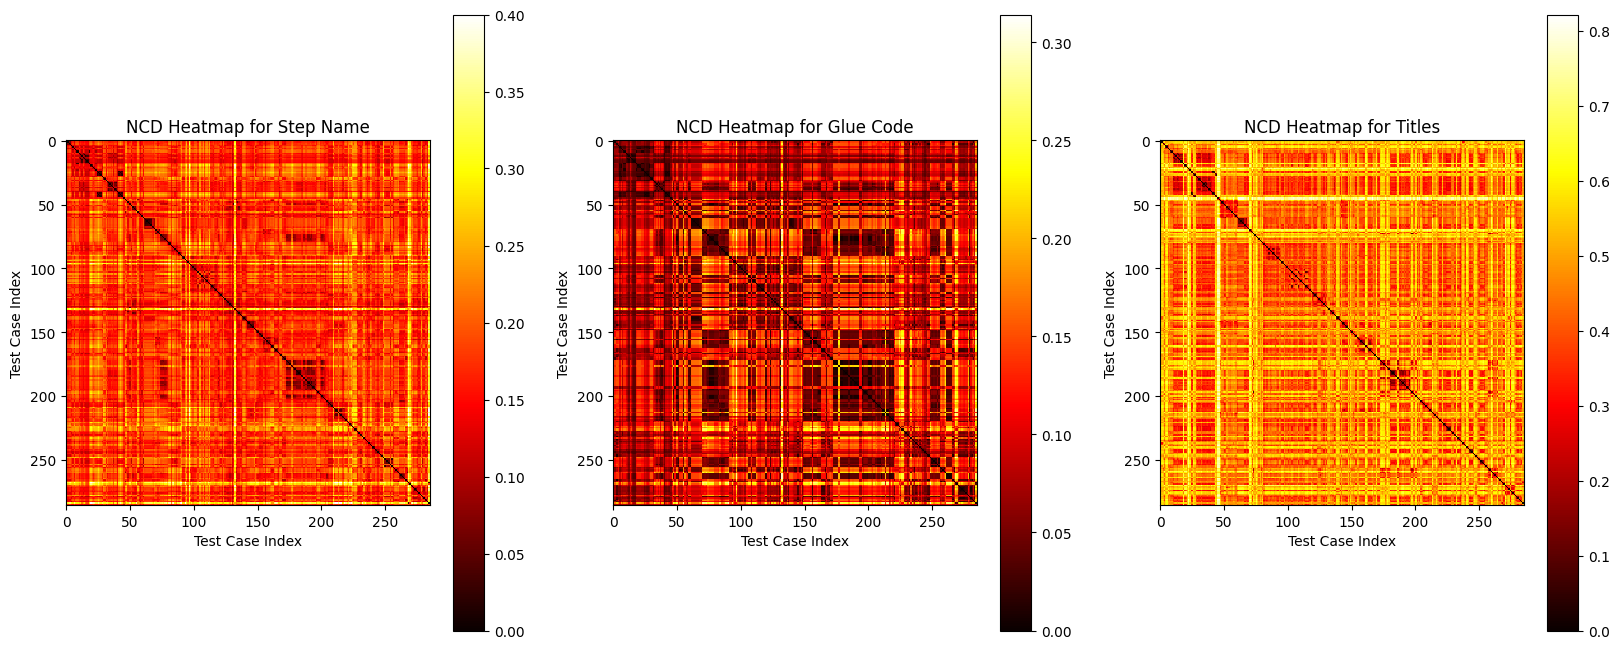

In [8]:
plot_heatmaps(step_name_ncd_matrix, step_definition_ncd_matrix, scenario_title_ncd_matrix, type="NCD")

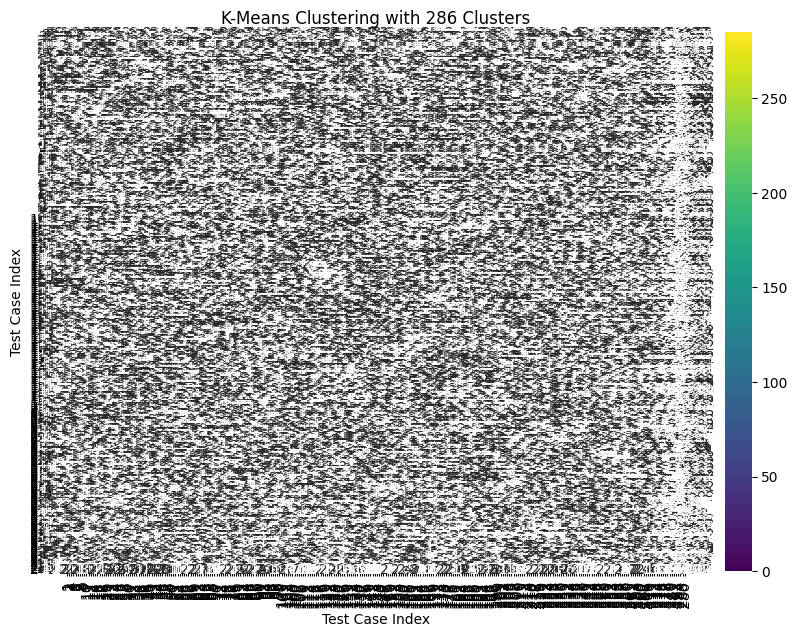

In [9]:
clusters = kmeans_clustering(step_name_ncd_matrix, len(test_data), scenario_nums)